unacc    1210
acc       384
good       69
vgood      65
Name: Classes, dtype: int64


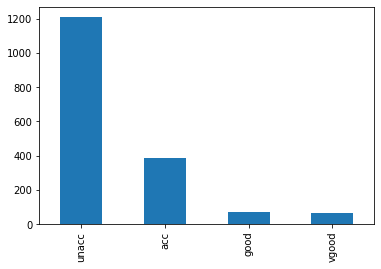

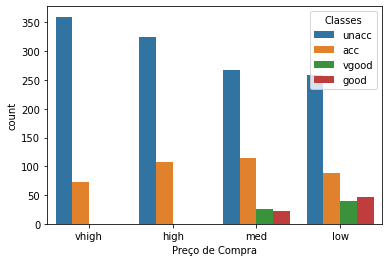

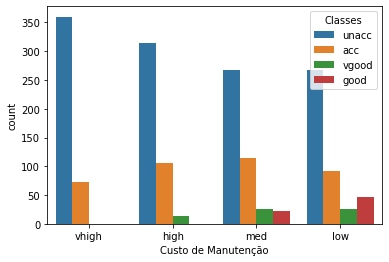

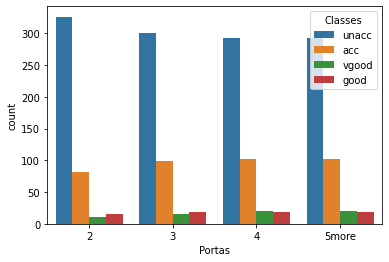

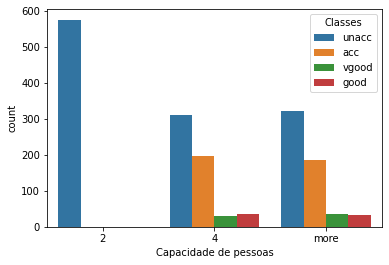

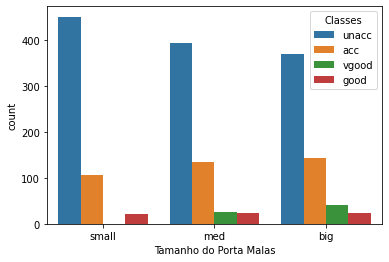

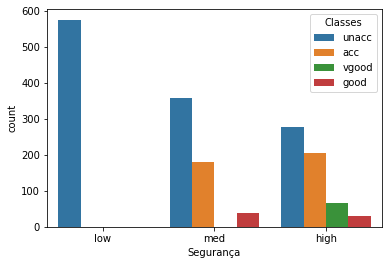

       Real Previsto
34    unacc    unacc
38    unacc    unacc
1502    acc      acc
815   unacc    unacc
61    unacc    unacc
...     ...      ...
11    unacc    unacc
1633    acc      acc
1147    acc      acc
598   unacc    unacc
322     acc      acc

[346 rows x 2 columns]
              precision    recall  f1-score   support

         acc       0.85      0.92      0.88       104
       unacc       0.97      0.93      0.95       242

    accuracy                           0.93       346
   macro avg       0.91      0.93      0.92       346
weighted avg       0.93      0.93      0.93       346

['acc' 'unacc']
Score: 0.6563095994914177
mse: 0.07225433526011561


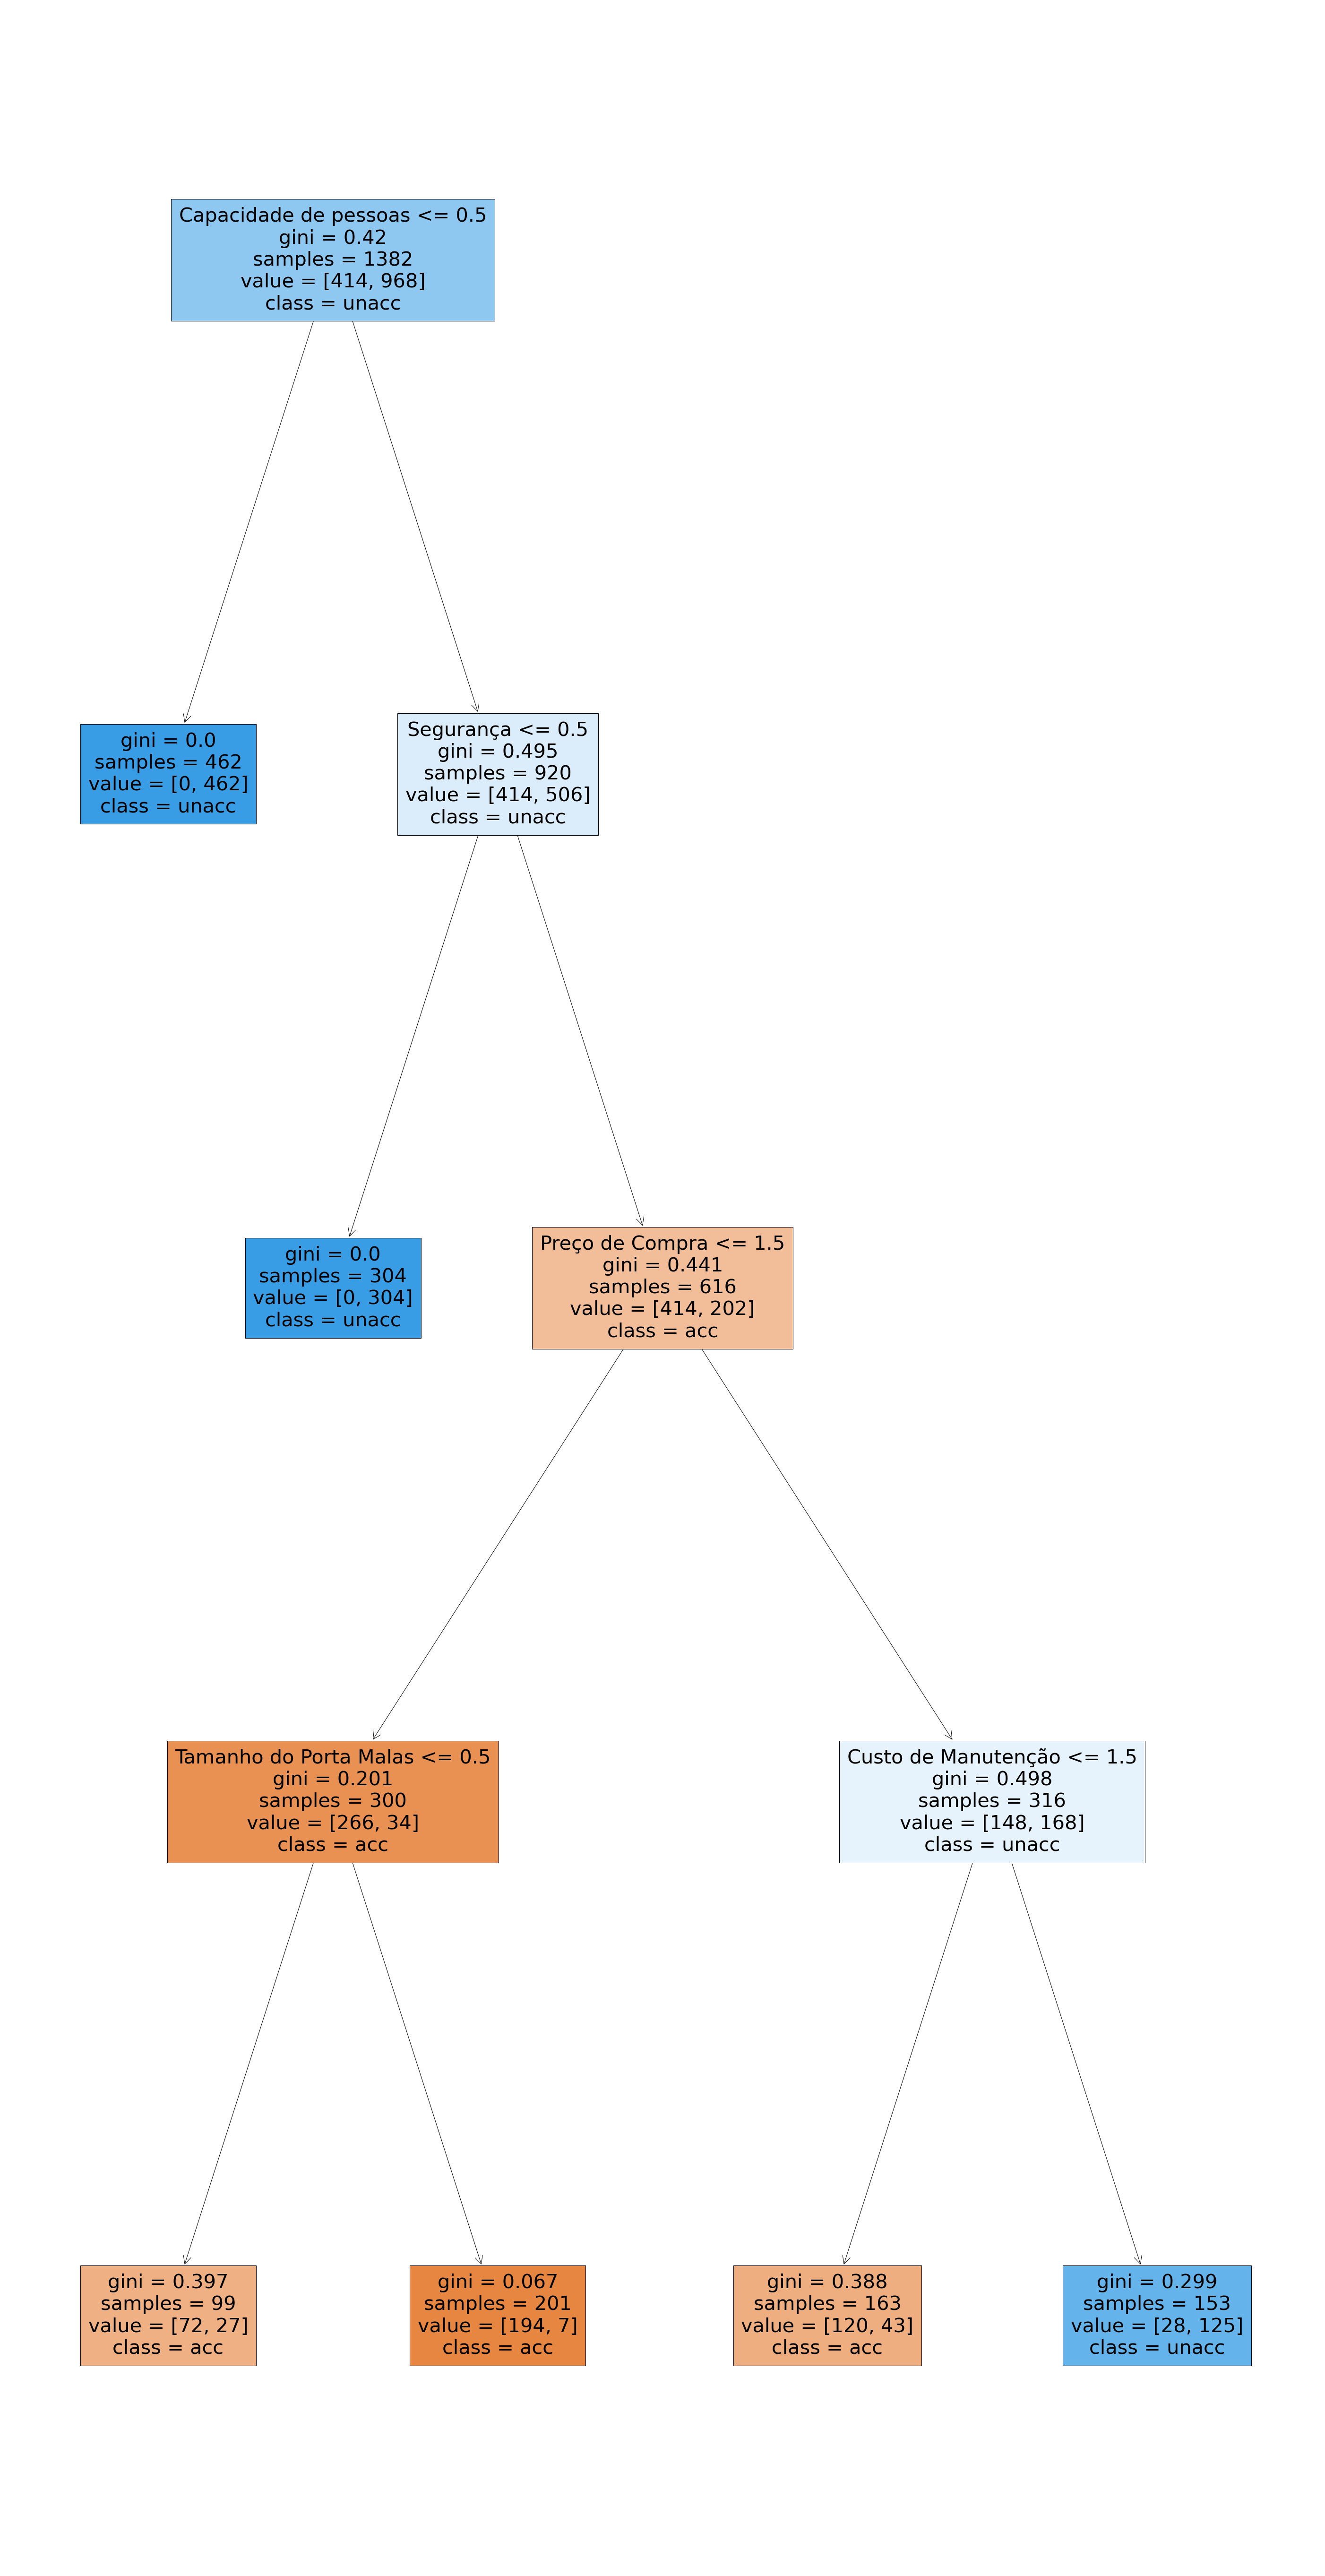

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
#from sklearn.ensemble import RandomForestRegressor


dataset_url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'

column = ['Preço de Compra', 'Custo de Manutenção', 'Portas', 'Capacidade de pessoas', 'Tamanho do Porta Malas', 'Segurança', 'Classes']
data = pd.read_csv(dataset_url, names = column, sep = ',')

print(data['Classes'].value_counts())

data['Classes'].value_counts().plot(kind = 'bar')
plt.show()

column.remove('Classes')

for name in column:
  sns.countplot(x=data[name], hue = data['Classes'])
  plt.show()

data['Classes'] = data['Classes'].replace(['good', 'vgood'], 'acc')

buying_price_category = ["low", "med", "high", "vhigh"]
maint_cost_category = ["low", "med", "high", "vhigh"]
doors_category = ["2", "3", "4", "5more"]
person_capacity_category = ["2", "4", "more"]
lug_boot_category = ["small", "med", "big"]
safety_category = ["low", "med", "high"]
all_categories = [buying_price_category, maint_cost_category,doors_category,person_capacity_category,lug_boot_category,safety_category]

oe = OrdinalEncoder(categories = all_categories)
X = oe.fit_transform(data[['Preço de Compra', 'Custo de Manutenção', 'Portas', 'Capacidade de pessoas', 'Tamanho do Porta Malas', 'Segurança']])
y = data['Classes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify = y)

classifier = DecisionTreeClassifier(max_depth= 4)
classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)
df_preds = pd.DataFrame({"Real":y_test.squeeze(), "Previsto":pred.squeeze()})
print(df_preds)

le = LabelEncoder()
print(classification_report(y_test, pred))
y_enc = le.fit_transform(y_test)
pred_enc = le.fit_transform(pred)
print(le.classes_)
print( "Score:",r2_score(y_enc, pred_enc) )
print( "mse:", mean_squared_error(y_enc, pred_enc) )

from sklearn import tree
fig = plt.figure(figsize=(50,100))
aux = tree.plot_tree(classifier,
feature_names=data.columns[:-1],
class_names= classifier.classes_, filled=True)
plt.show()
fig.savefig('tree.png')
